<a href="https://colab.research.google.com/github/m1016m/NN/blob/master/Python%EF%BC%9AVIX%E7%BE%8E%E8%82%A1%E5%A4%A7%E8%B7%8C%E6%8A%95%E8%B3%87%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import io
import requests

# download vix
resvix = res = requests.get("http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv")

# format vix close price series
vix = pd.read_csv(io.BytesIO(resvix.content), header=1, index_col='Date', parse_dates=['Date'])
vixc = vix['VIX Close']

In [ ]:
import io
import requests
import pandas as pd

# download benchmark sp500
res = requests.get("http://www.cboe.com/micro/buywrite/dailypricehistory.xls")

# format sp500 benchmark
b = pd.read_excel(io.BytesIO(res.content), header=4, index_col=0)['SPXSM'].dropna()

b = b[vixc.index]

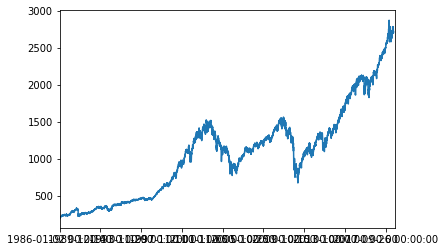

In [ ]:
%matplotlib inline
b.plot()

In [ ]:
(b.dropna()[-1]/b[0]) ** (250/len(b))

1.0591257696945158

In [ ]:
# vix 大於 th 時，進行買入
th = 40
# 持有 days 天
days = 250

# 當天是否買入
buy = (vixc > th)

# 確保最近三十天並沒有buy發生，才是需要買入的訊號
buy &= (buy.shift().rolling(30).mean() == 0)



(3904,)

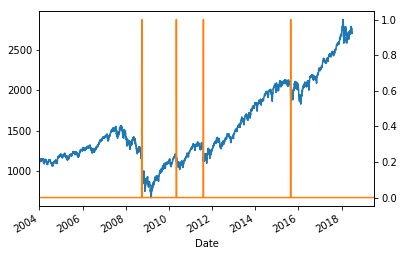

In [ ]:
b.plot()
buy.astype(float).plot(secondary_y=True)

In [ ]:
# 當天收盤價
price_begin = b[buy]

# 隔250天後 的收盤價
price_end = b.shift(-days)[buy]

# 報酬率計算
ret = (price_end/price_begin)
ret

Date
2008-09-29    0.943953
2010-05-07    1.212840
2011-08-08    1.242554
2015-08-24    1.153528
Name: SPXSM, dtype: float64

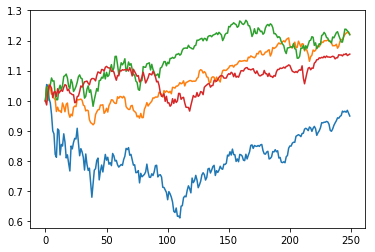

In [ ]:
import matplotlib.pyplot as plt

def normalize(s):
    return s / s[0]

for d in ret.index.dropna():
    plt.plot(normalize(b.loc[d:].head(250).values))


In [ ]:
th = 40
days = 250

buy = (
    ((vixc > th).rolling(120).sum() > 0) &
    (vixc < 30)
)

buy &= (buy.shift().rolling(30).mean() == 0)

price_begin = b[buy]
price_end = b.shift(-days)[buy]
ret = (price_end/price_begin)#.groupby(price_begin.index.year).first()
ret

Date
2009-05-19    1.251957
2010-05-10    1.151216
2011-10-14    1.170066
2015-08-27    1.094473
Name: SPXSM, dtype: float64

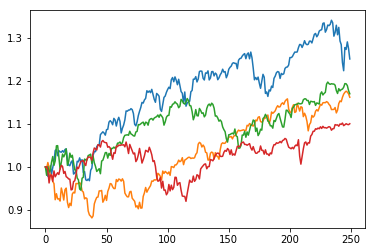

In [ ]:
import matplotlib.pyplot as plt

def normalize(s):
    return s / s[0]

for d in ret.index.dropna():
    plt.plot(normalize(b.loc[d:].head(250).values))